<a href="https://colab.research.google.com/github/sankalp294/cognifyz-ds-internship/blob/main/04_level2_Table_Booking%2C_Delivery%2C_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

🔹 Table Booking Availability (%):
Has Table booking
No     87.88
Yes    12.12
Name: proportion, dtype: float64

🔹 Online Delivery Availability (%):
Has Online delivery
No     74.34
Yes    25.66
Name: proportion, dtype: float64

🔹 Average Rating (Based on Table Booking):
Has Table booking
No     2.56
Yes    3.44
Name: Aggregate rating, dtype: float64

🔹 Online Delivery % by Price Range:
Has Online delivery     No    Yes
Price range                      
1                    84.23  15.77
2                    58.69  41.31
3                    70.81  29.19
4                    90.96   9.04


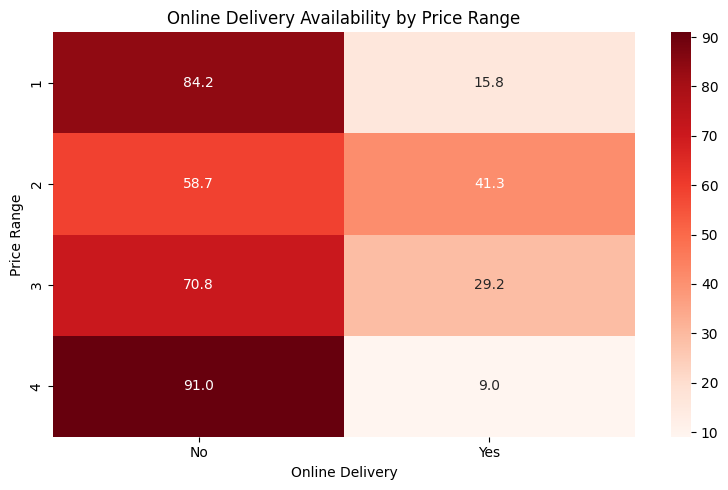

In [2]:


# Load the cleaned dataset
df = pd.read_csv("cleaned_dataset (1).csv", encoding="latin1")

# ────────────────────────────────
# 1. Percentage of Table Booking & Online Delivery
# ────────────────────────────────
print("🔹 Table Booking Availability (%):")
table_booking_pct = df['Has Table booking'].value_counts(normalize=True) * 100
print(table_booking_pct.round(2))

print("\n🔹 Online Delivery Availability (%):")
online_delivery_pct = df['Has Online delivery'].value_counts(normalize=True) * 100
print(online_delivery_pct.round(2))

# ────────────────────────────────
# 2. Average Ratings Comparison (Table Booking)
# ────────────────────────────────
print("\n🔹 Average Rating (Based on Table Booking):")
table_rating = df.groupby("Has Table booking")["Aggregate rating"].mean()
print(table_rating.round(2))

# ────────────────────────────────
# 3. Online Delivery by Price Range
# ────────────────────────────────
print("\n🔹 Online Delivery % by Price Range:")
delivery_by_price = pd.crosstab(df["Price range"], df["Has Online delivery"], normalize='index') * 100
print(delivery_by_price.round(2))

# ────────────────────────────────
# 4. Optional Visualization (Heatmap)
# ────────────────────────────────
plt.figure(figsize=(8, 5))
sns.heatmap(delivery_by_price, annot=True, cmap='Reds', fmt=".1f")
plt.title("Online Delivery Availability by Price Range")
plt.ylabel("Price Range")
plt.xlabel("Online Delivery")
plt.tight_layout()
plt.show()
